<a href="https://colab.research.google.com/github/AnnLivio/Pizza_sales_report/blob/main/Pizza_sales_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We ♥ Pizza: Pizza Sales Prediction using Prophet 🍕

1. Install Prophet, import libraries and packages
2. Load data and merge tables
 + Rename datetime and quantity columns as `ds` and `y`
3. Create and fit the model
 + Create a new DataFrame for future dates
 + Make predictions
 + Visualize predictions
4. Evaluate the model
5. ↩ Keep working

## 1. Install Prophet, import libraries and packages

In [50]:
# Install prophet
!pip install prophet

In [51]:
# Import libraries and packages
import pandas as pd
import numpy as np

from prophet import Prophet

## 2. Load data and merge tables

In [52]:
path_folder = "/content/drive/MyDrive/Data Analysis/Simple_Projects/pizza_sales_data/"
orders = pd.read_csv(path_folder + "orders.csv")
order_details = pd.read_csv(path_folder + "order_details.csv")

In [53]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [54]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Rename columns for prophet

In [55]:
# Merge the dataframes
pizzas = orders.merge(order_details[['quantity', 'order_id']], on='order_id')
pizzas.head()

,order_id,date,time,quantity
0,1,2015-01-01,11:38:36,1
1,2,2015-01-01,11:57:40,1
2,2,2015-01-01,11:57:40,1
3,2,2015-01-01,11:57:40,1
4,2,2015-01-01,11:57:40,1


In [58]:
# Group data by day
pizzas = pizzas.groupby('date').agg({'quantity':'sum'}).reset_index()

# Rename columns
pizzas.rename(columns={'date':'ds','quantity': 'y'}, inplace=True)

pizzas.head()

,ds,y
0,2015-01-01,162
1,2015-01-02,165
2,2015-01-03,158
3,2015-01-04,106
4,2015-01-05,125


## 3. Create and fit the model
### Create a new DF for future dates / Make predictions / Visualize predictions

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuiukwd9_/a7h4wb_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuiukwd9_/7r58uq4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93710', 'data', 'file=/tmp/tmpuiukwd9_/a7h4wb_1.json', 'init=/tmp/tmpuiukwd9_/7r58uq4a.json', 'output', 'file=/tmp/tmpuiukwd9_/prophet_model2xrppxg4/prophet_model-20241119170544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


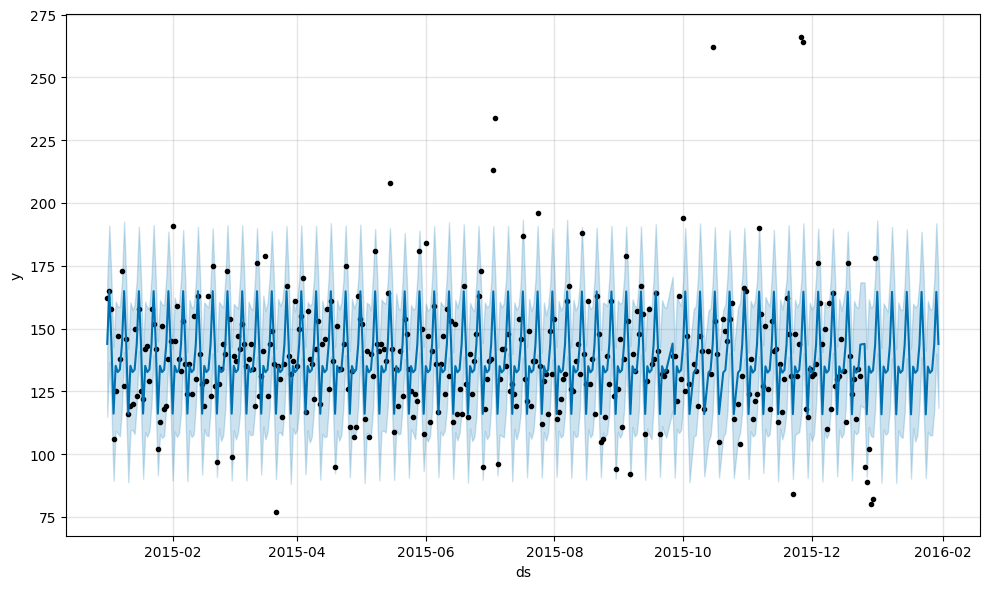

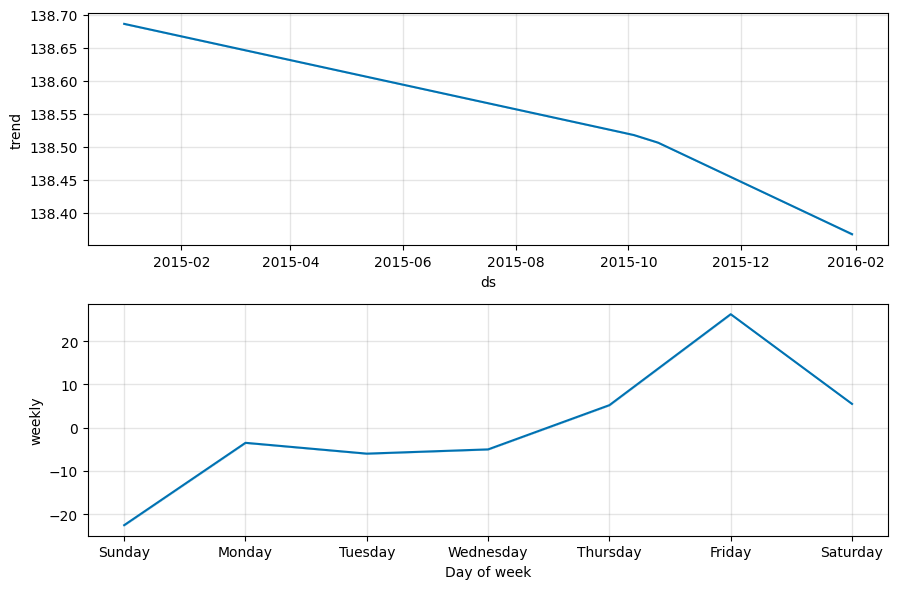

In [59]:
# Crear el modelo de Prophet
m = Prophet()

# Entrenar el modelo
m.fit(pizzas)

# Crear un nuevo DataFrame para las fechas futuras
future = m.make_future_dataframe(periods=30, freq='D')  # Predecir para los próximos 30 días

# Hacer las predicciones
forecast = m.predict(future)

# Visualizar las predicciones
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

## 4. Model Evaluation

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [64]:
# Get the real values
y_true = pizzas['y']

# Get the predicted values
y_pred = forecast['yhat'][:len(pizzas)]

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

RMSE: 20.15485910096631


In [65]:
# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

MAE: 13.77225733057965


## 5. Model Adjust ↩

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuiukwd9_/_ud4fxw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuiukwd9_/r3sh5i8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83041', 'data', 'file=/tmp/tmpuiukwd9_/_ud4fxw9.json', 'init=/tmp/tmpuiukwd9_/r3sh5i8z.json', 'output', 'file=/tmp/tmpuiukwd9_/prophet_modelussgji0f/prophet_model-20241119175621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
17:56:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error durin

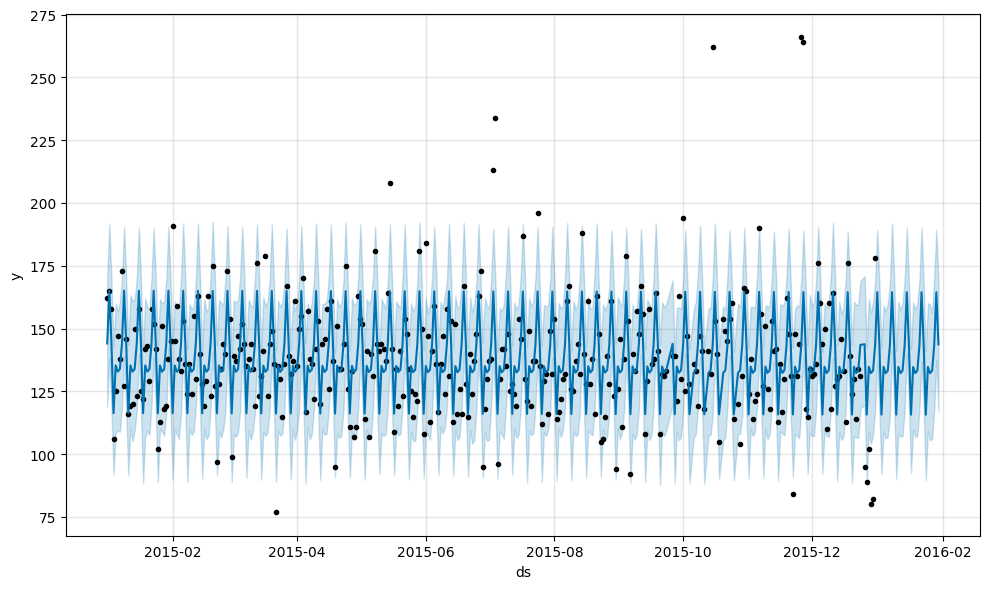

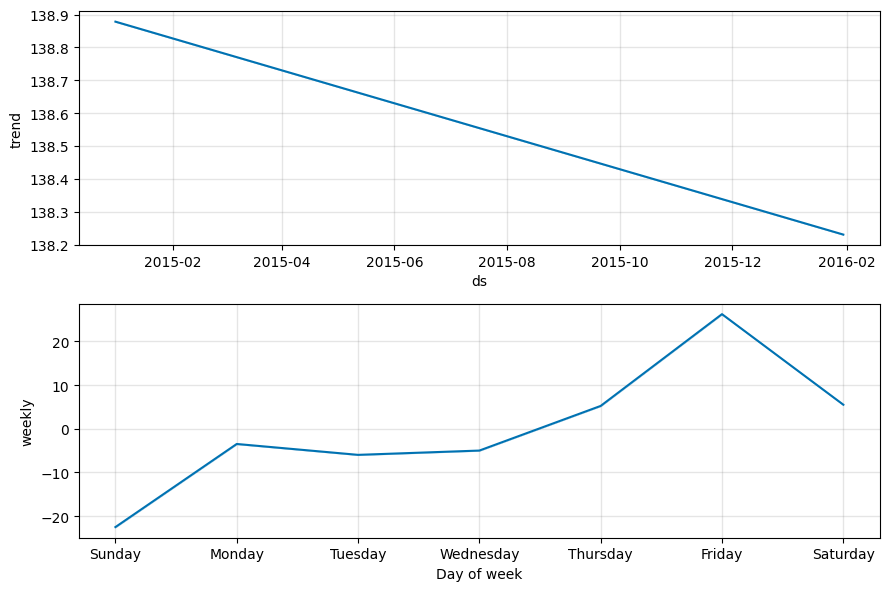

In [77]:
# Crear el modelo de Prophet
m2 = Prophet(changepoints=['2015-11-26', '2015-11-27'], daily_seasonality=False)

# Entrenar el modelo
m2.fit(pizzas)

# Crear un nuevo DataFrame para las fechas futuras
future = m2.make_future_dataframe(periods=30, freq='D')  # Predecir para los próximos 30 días

# Hacer las predicciones
forecast = m2.predict(future)

# Visualizar las predicciones
fig1 = m2.plot(forecast)
fig2 = m2.plot_components(forecast)


In [78]:
# Get the predicted values
y_pred = forecast['yhat'][:len(pizzas)]

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

RMSE: 20.155335731210048
MAE: 13.765757269197282


## Ajustaremos el modelo para cada categoría de pizza en otro ipynb

Analysis by Ann Livio.